In [14]:
using JuMP, Ipopt, PyPlot

In [2]:
include("read_data.jl")
include("models.jl")

create_model (generic function with 1 method)

In [3]:
hydrosys_folder = "p1"
hydrosys_instance = "i2"

hydro_data,hydro_instance = read_data(hydrosys_folder,hydrosys_instance)

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = read_data(::String, ::String) at read_data.jl:18
└ @ Main /home/fsobral/personal/working/radix/6BSGI/src/read_data.jl:18
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = read_data(::String, ::String) at read_data.jl:19
└ @ Main /home/fsobral/personal/working/radix/6BSGI/src/read_data.jl:19


(Dict{Any,Any}("usinas"=>Dict{Any,Any}("H1"=>Dict{Any,Any}("cotaMontante"=>[243.0, 1.07, -0.0011, 5.21e-7, -9.24e-11],"nUG"=>3,"vmin"=>1.32,"UG"=>Dict{Any,Any}[Dict("vazaoMax"=>[2582.0, -48.71, 0.3187, -0.0006759],"rendimentoHidraulico"=>[0.359, 0.00554, 0.00199, 1.05e-5, -2.73e-5, -9.43e-6],"perdaGerador"=>[1.998, 0.001735],"hproj"=>182.0,"pmax"=>293.3,"perdaHidraulica"=>[8.889e-5, 4.183e-5, 0.0],"vazaoMin"=>[225.7, -2.694, 0.0234, -7.038e-5],"perdaMecTurbina"=>[-0.3317, 0.003741, -2.591e-6],"pmin"=>172.0,"rampa"=>0.15…), Dict("vazaoMax"=>[2582.0, -48.71, 0.3187, -0.0006759],"rendimentoHidraulico"=>[0.359, 0.00554, 0.00199, 1.05e-5, -2.73e-5, -9.43e-6],"perdaGerador"=>[1.998, 0.001735],"hproj"=>182.0,"pmax"=>293.3,"perdaHidraulica"=>[8.889e-5, 4.183e-5, 0.0],"vazaoMin"=>[225.7, -2.694, 0.0234, -7.038e-5],"perdaMecTurbina"=>[-0.3317, 0.003741, -2.591e-6],"pmin"=>172.0,"rampa"=>0.15…), Dict("vazaoMax"=>[2582.0, -48.71, 0.3187, -0.0006759],"rendimentoHidraulico"=>[0.359, 0.00554, 0.00199

In [7]:
model = Model(optimizer_with_attributes(
    Ipopt.Optimizer,
    "constr_viol_tol" => 1.0e-2,
    "acceptable_tol"  => 1.0e-5,
    "print_level"     => 4
))

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [ ]:
create_model(model,hydro_data,hydro_instance);

In [9]:
optimize!(model)

Total number of variables............................:     3505
                     variables with only lower bounds:     3505
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      960
Total number of inequality constraints...............:     2040
        inequality constraints with only lower bounds:      868
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1172


Number of Iterations....: 201

                                   (scaled)                 (unscaled)
Objective...............:  -1.1346837033177360e+02    1.1346837033177359e+07
Dual infeasibility......:   2.9774051723278233e-18    2.9774051723278228e-13
Constraint violation....:   5.8207660913467407e-11    5.8207660913467407e-11
Complementarity.........:   1.6067292565167790e-13   -1.6067292565167790e-08
Overall NLP 

In [10]:
ind = Dict(j => i for (i, j) in enumerate(keys(hydro_data["usinas"])))

Dict{String,Int64} with 4 entries:
  "H1" => 1
  "H3" => 2
  "H4" => 3
  "H2" => 4

In [11]:
T = length(hydro_instance["precos"])
N = length(ind)

4

In [12]:
M = zeros(T, N);

In [13]:
pg = value.(model[:pg])

for (u, t, j) in eachindex(pg)
    M[t, ind[u]] += pg[u, t, j]
end

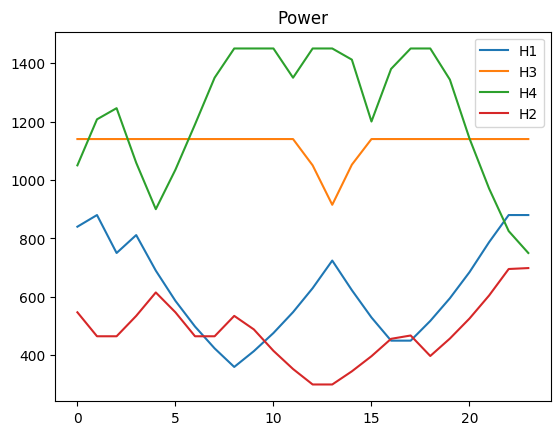

PyObject Text(0.5, 1, 'Power')

In [28]:
for (i, u) in enumerate(keys(ind))
    PyPlot.plot(M[:,i], label=u)
end

PyPlot.legend()
PyPlot.title("Power")

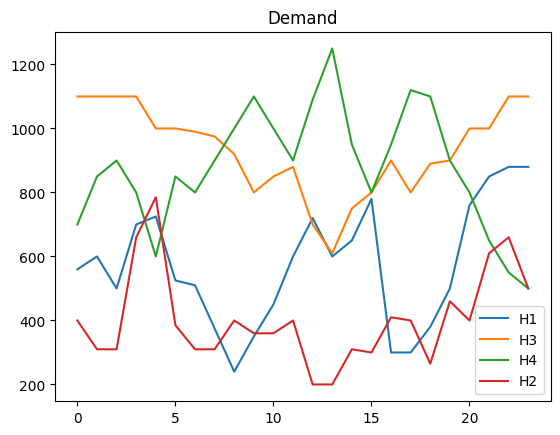

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[32]:2
└ @ Core ./In[32]:2


PyObject Text(0.5, 1, 'Demand')

In [32]:
for (i, u) in enumerate(keys(ind))
    PyPlot.plot(hydro_instance["demanda"][u], label=u)
end

PyPlot.legend()
PyPlot.title("Demand")

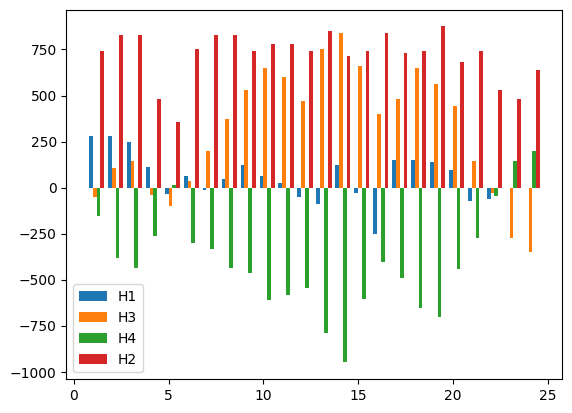

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[45]:5
└ @ Core ./In[45]:5


PyObject <matplotlib.legend.Legend object at 0x7f59eb1da2b0>

In [45]:
diff = M - hydro_instance["demanda"]
width = 0.2
x = [1:T;]
for (i,u) in enumerate(keys(ind))
    PyPlot.bar(x .+ (2*i - 3) * width / 2, diff[u], width, label=u)
end
PyPlot.legend()

In [52]:
diff

,H1,H2,H3,H4
Tempo,,,,
0,280.000008,740.000011,-49.999990,-152.941171
1,279.900009,830.000011,107.500012,-384.999995
2,250.000007,830.000011,145.674753,-434.999995
3,111.349320,480.000011,-41.176460,-265.249995
4,-35.353078,355.000011,-99.999991,14.962506
5,61.199884,755.000011,35.000010,-302.941171
6,-11.730099,830.000011,200.250012,-334.999995
7,48.529416,830.000011,375.000013,-434.999995
8,120.000004,740.000011,530.000014,-465.249995


In [51]:
sum([sum(diff[i]) for i in keys(ind)])

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = (::getfield(Main, Symbol("##99#100")))(::String) at none:0
└ @ Main ./none:0


16217.859466562708

In [22]:
v = value.(model[:v])
V = v.data

4×24 Array{Float64,2}:
 1.42784  1.40304  1.40111  1.40088  …  1.40003  1.39775  1.39914  1.37601
 4.80548  4.56468  4.41763  4.31338     3.3922   3.26012  3.1101   2.84425
 2.99445  2.7167   3.04667  2.89871     2.84849  2.76992  2.84248  2.72014
 4.8427   4.58176  4.75389  4.67904     4.7165   4.71597  4.71227  4.6544 

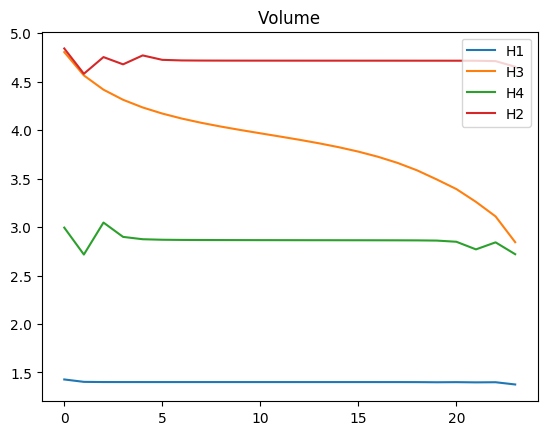

PyObject Text(0.5, 1, 'Volume')

In [24]:
for (i, u) in enumerate(keys(ind))
    PyPlot.plot(V[i,:], label=u)
end

PyPlot.legend()
PyPlot.title("Volume")